In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_clean_app_train.csv')

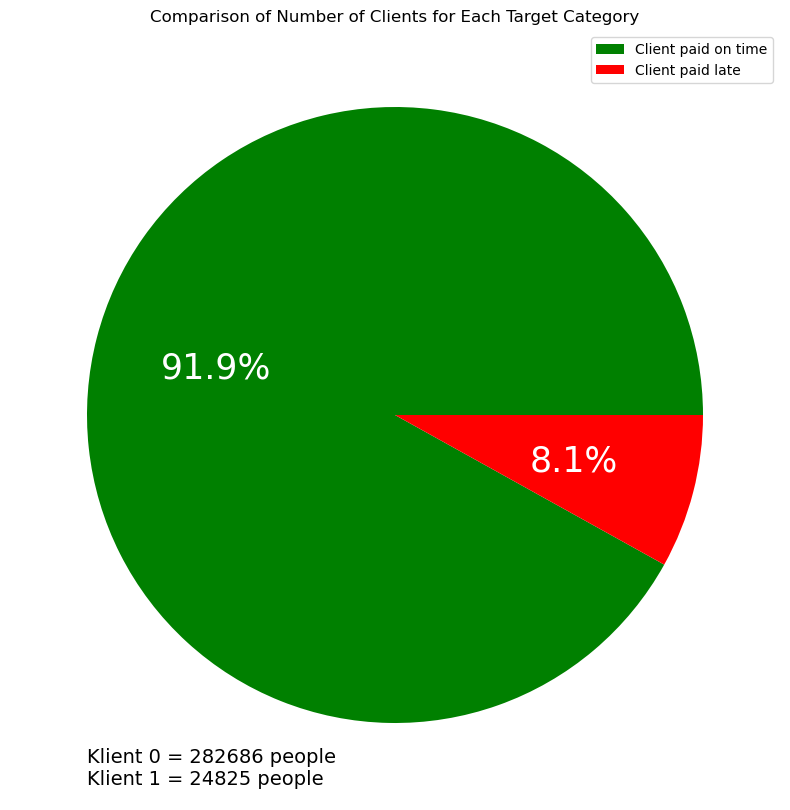

In [3]:
import matplotlib.pyplot as plt

# Menghitung jumlah klien untuk setiap kategori target
target_counts = df['TARGET'].value_counts()

# Membuat pie chart
plt.figure(figsize=(10, 10))
plt.pie(target_counts, autopct='%1.1f%%', colors=['green', 'red'], textprops={'color': 'white', 'fontsize': 25})

# Menambahkan legenda
plt.legend(labels=['Client paid on time', 'Client paid late'], loc='upper right')

# Menambahkan judul
plt.title('Comparison of Number of Clients for Each Target Category')

# Menambahkan jumlah klien untuk setiap kategori target
plt.text(-1, -1.2, f'Klient 0 = {target_counts[0]} people\nKlient 1 = {target_counts[1]} people', fontsize=14)

# Menampilkan plot
plt.show()


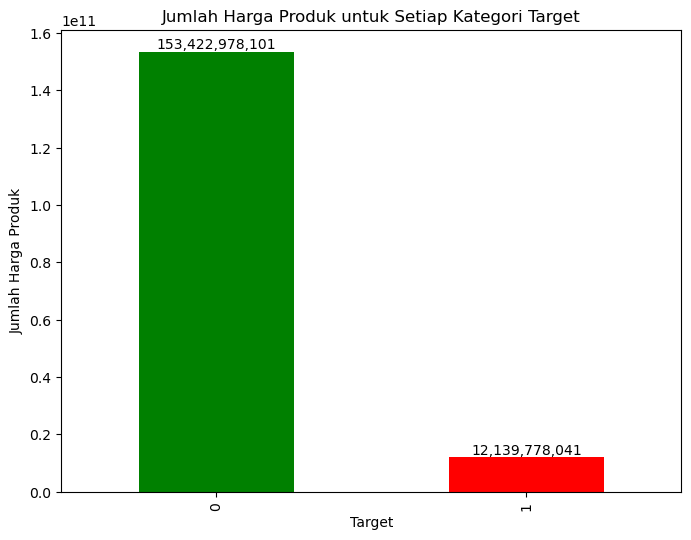

In [4]:
import matplotlib.pyplot as plt

# Menghitung jumlah AMT_GOODS_PRICE untuk setiap kategori target
amt_goods_price_sum = df.groupby('TARGET')['AMT_GOODS_PRICE'].sum()

# Membuat bar plot
plt.figure(figsize=(8, 6))
bars = amt_goods_price_sum.plot(kind='bar', color=['green', 'red'])

# Menambahkan judul
plt.title('Jumlah Harga Produk untuk Setiap Kategori Target')
plt.xlabel('Target')
plt.ylabel('Jumlah Harga Produk')

# Menambahkan label untuk setiap bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50000,
             f'{int(bar.get_height()):,}',
             ha='center', va='bottom')

# Menampilkan plot
plt.show()

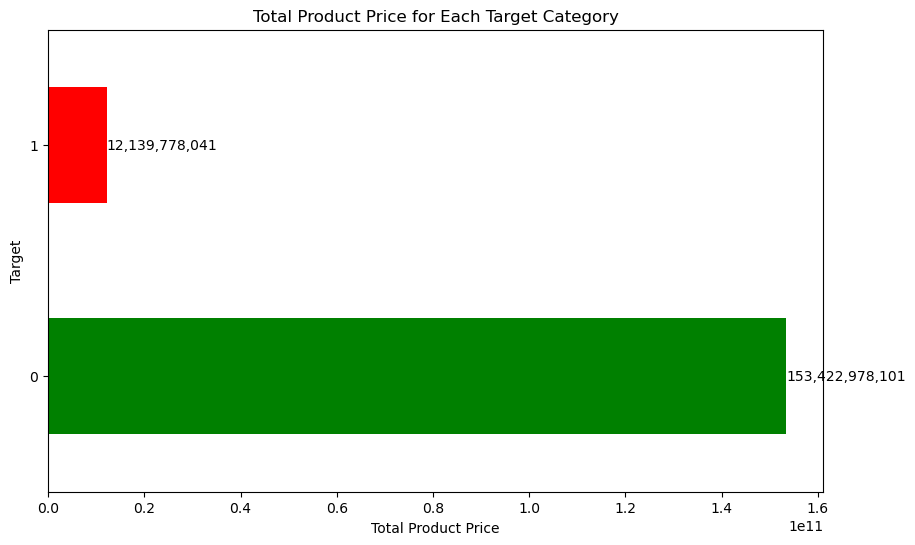

In [5]:
import matplotlib.pyplot as plt

# Menghitung jumlah AMT_GOODS_PRICE untuk setiap kategori target
amt_goods_price_sum = df.groupby('TARGET')['AMT_GOODS_PRICE'].sum()

# Membuat bar plot horizontal
plt.figure(figsize=(10, 6))
bars = amt_goods_price_sum.plot(kind='barh', color=['green', 'red'])

# Menambahkan judul
plt.title('Total Product Price for Each Target Category')
plt.xlabel('Total Product Price')
plt.ylabel('Target')

# Menambahkan label untuk setiap bar
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width()):,}',
             ha='left', va='center')

# Menampilkan plot
plt.show()


In [6]:
df["AMT_INCOME_TOTAL"]

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

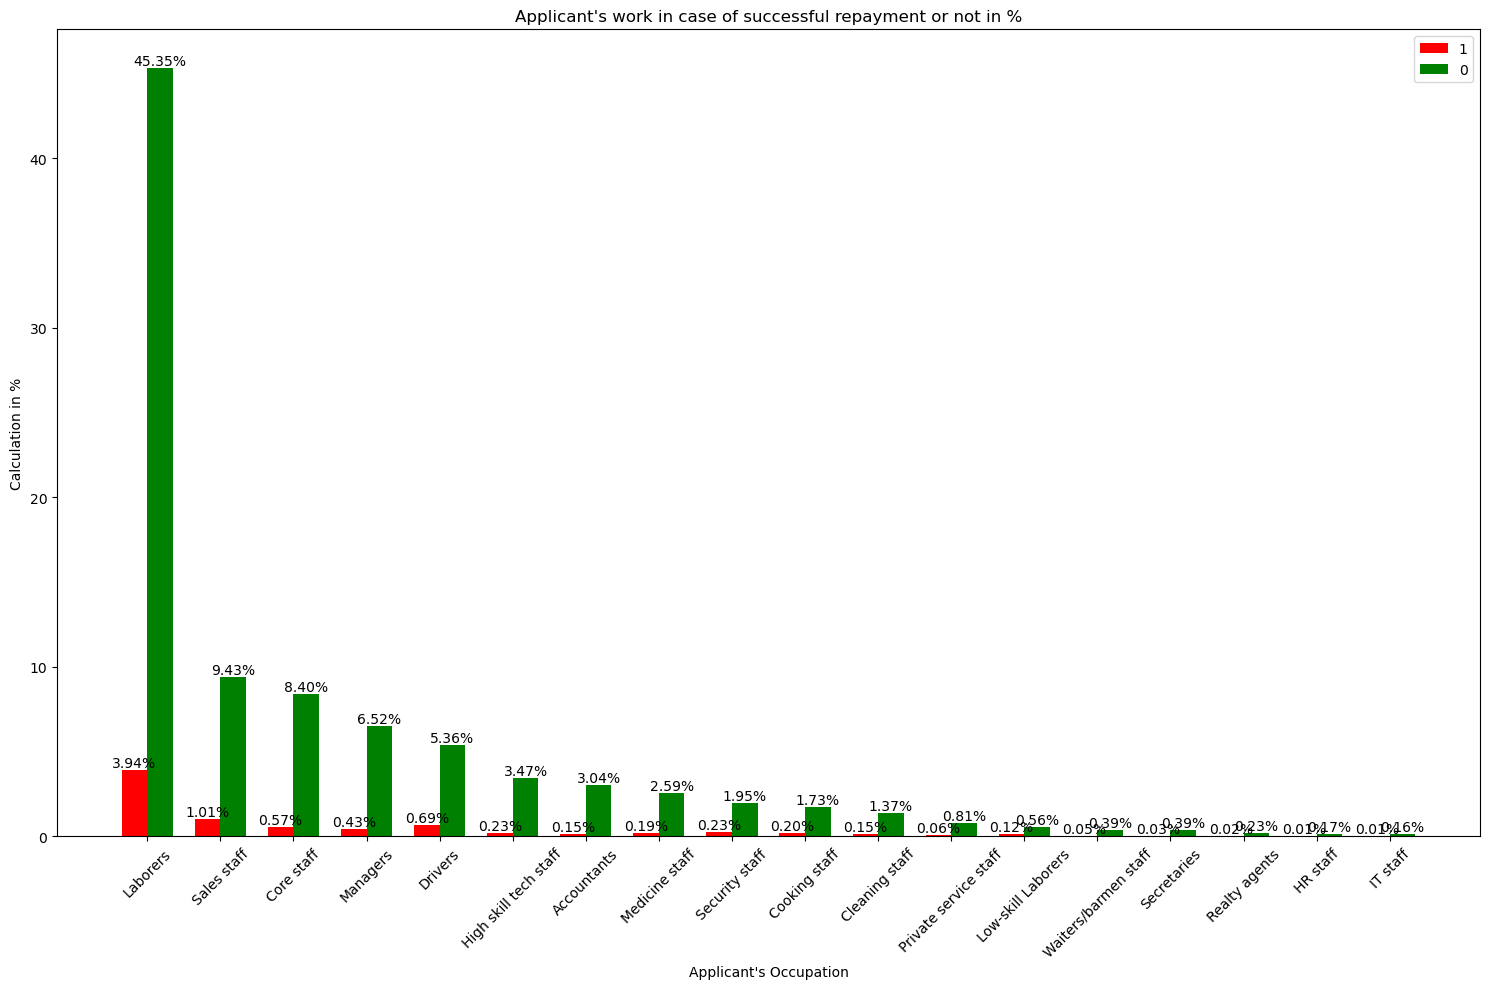

Pekerjaan                   | Kesulitan Membayar    | Tanpa Kesulita/ lainnya
Laborers                    | 3.94%                 | 45.35%
Sales staff                 | 1.01%                 | 9.43%
Core staff                  | 0.57%                 | 8.40%
Managers                    | 0.43%                 | 6.52%
Drivers                     | 0.69%                 | 5.36%
High skill tech staff       | 0.23%                 | 3.47%
Accountants                 | 0.15%                 | 3.04%
Medicine staff              | 0.19%                 | 2.59%
Security staff              | 0.23%                 | 1.95%
Cooking staff               | 0.20%                 | 1.73%
Cleaning staff              | 0.15%                 | 1.37%
Private service staff       | 0.06%                 | 0.81%
Low-skill Laborers          | 0.12%                 | 0.56%
Waiters/barmen staff        | 0.05%                 | 0.39%
Secretaries                 | 0.03%                 | 0.39%
Realty agents        

In [7]:
# Data
temp = df["OCCUPATION_TYPE"].value_counts()
temp_y0 = []
temp_y1 = []

for val in temp.index:
    temp_y1.append(np.sum((df["OCCUPATION_TYPE"] == val) & (df["TARGET"] == 1)))
    temp_y0.append(np.sum((df["OCCUPATION_TYPE"] == val) & (df["TARGET"] == 0)))

total_count = temp.sum()
percentage_y1 = [(count / total_count) * 100 for count in temp_y1]
percentage_y0 = [(count / total_count) * 100 for count in temp_y0]

# Plotting
plt.figure(figsize=(15, 10))

bar_width = 0.35
index = np.arange(len(temp))

bar1 = plt.bar(index, percentage_y1, bar_width, color='red', label='1')
bar2 = plt.bar(index + bar_width, percentage_y0, bar_width, color='green', label='0')

plt.xlabel("Applicant's Occupation")
plt.ylabel("Calculation in %")
plt.title("Applicant's work in case of successful repayment or not in %")
plt.xticks(index + bar_width / 2, temp.index, rotation=45)
plt.legend()

# Menambahkan persentase di atas setiap bar
for rect1, rect2 in zip(bar1, bar2):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    plt.text(rect1.get_x() + rect1.get_width() / 2, height1, f'{height1:.2f}%', ha='center', va='bottom')
    plt.text(rect2.get_x() + rect2.get_width() / 2, height2, f'{height2:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print persentase di bawah bars
print("Pekerjaan                   | Kesulitan Membayar    | Tanpa Kesulita/ lainnya")
for i in range(len(temp)):
    print(f"{temp.index[i]:<27} | {percentage_y1[i]:.2f}%                 | {percentage_y0[i]:.2f}%")


In [8]:
df2 = pd.read_csv('data_clean_data_previous_application_clean.csv')

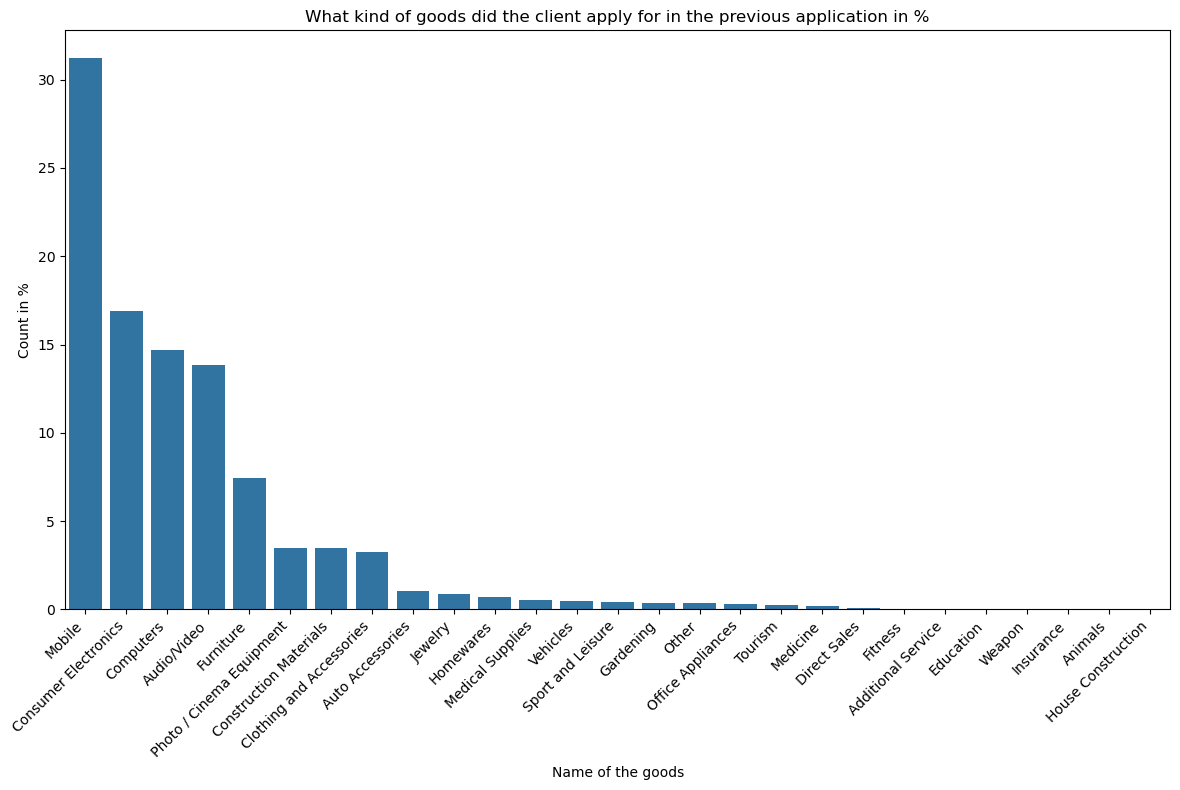

In [9]:
# # Menghapus entri 'XNA'
previous_application_cleaned = df2[df2['NAME_GOODS_CATEGORY'] != 'XNA']

# Menghitung jumlah masing-masing kategori barang
temp = previous_application_cleaned["NAME_GOODS_CATEGORY"].value_counts()

# Menggambar bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=(temp.index), y=(temp / temp.sum())*100)
plt.title("What kind of goods did the client apply for in the previous application in %")
plt.xlabel("Name of the goods")
plt.ylabel("Count in %")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ML

In [10]:
# df1 = pd.read_csv('data_clean_app_train.csv')
# df2 = pd.read_csv('data_clean_bureau.csv')
# df3 = pd.read_csv('data_clean_credit_card_balance.csv')
# df4 = pd.read_csv('data_clean_data_POS_CASH_balance_clean.csv')
# df5 = pd.read_csv('data_clean_data_previous_application_clean.csv')
# df6 = pd.read_csv('data_clean_installments_payments_clean.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [12]:
from sklearn.preprocessing import LabelEncoder

# Memilih kolom dengan tipe data objek
obj_cols = df.select_dtypes(include=['object']).columns

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan transformasi label encoder untuk setiap kolom objek
for col in obj_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Menampilkan hasil transformasi
print(df[obj_cols].head())


   NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                   0            1             0                1   
1                   0            0             0                0   
2                   1            1             1                1   
3                   0            0             0                1   
4                   0            1             0                1   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   3   
1                1                 4                    1                   1   
2                6                 7                    4                   3   
3                6                 7                    4                   0   
4                6                 7                    4                   3   

   NAME_HOUSING_TYPE  OCCUPATION_TYPE  WEEKDAY_APPR_PROCESS_START  \
0                  1         

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  int32  
 3   CODE_GENDER                  307511 non-null  int32  
 4   FLAG_OWN_CAR                 307511 non-null  int32  
 5   FLAG_OWN_REALTY              307511 non-null  int32  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  int32  
 12  NAME_INCOME_TYPE             307511 non-null  int32  
 13 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression (Training): 0.9192018145751357
Accuracy of Logistic Regression (Testing): 0.9195161211648212
Accuracy of Gradient Boosting Classifier (Training): 0.9196570843224611
Accuracy of Gradient Boosting Classifier (Testing): 0.919760011706746


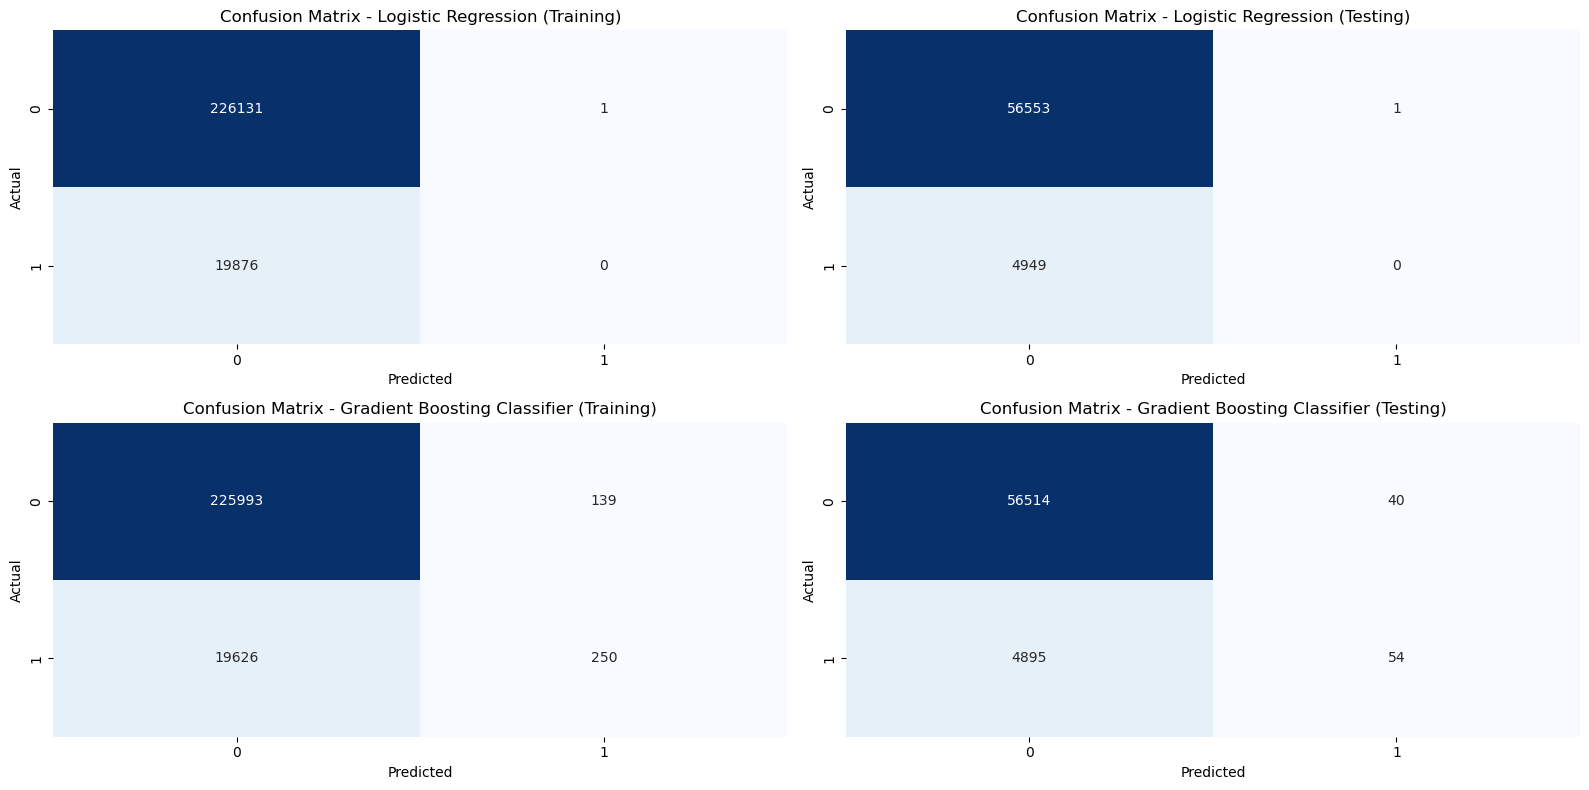


Classification Report - Logistic Regression (Training):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226132
           1       0.00      0.00      0.00     19876

    accuracy                           0.92    246008
   macro avg       0.46      0.50      0.48    246008
weighted avg       0.84      0.92      0.88    246008


Classification Report - Logistic Regression (Testing):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503


Classification Report - Gradient Boosting Classifier (Training):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226132
           1       0.64      0.01      0.02     19876

   

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Memisahkan fitur dan target
X = df.drop(columns=['TARGET','SK_ID_CURR'])
y = df['TARGET']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menginisialisasi model Logistic Regression dan GBC
logistic_regression = LogisticRegression()
gbc = GradientBoostingClassifier()

# Melatih model Logistic Regression
logistic_regression.fit(X_train, y_train)

# Melatih model GBC
gbc.fit(X_train, y_train)

# Melakukan prediksi pada data latih dan data uji
y_pred_train_lr = logistic_regression.predict(X_train)
y_pred_test_lr = logistic_regression.predict(X_test)

y_pred_train_gbc = gbc.predict(X_train)
y_pred_test_gbc = gbc.predict(X_test)

# Menghitung akurasi masing-masing model untuk data latih dan data uji
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)

accuracy_train_gbc = accuracy_score(y_train, y_pred_train_gbc)
accuracy_test_gbc = accuracy_score(y_test, y_pred_test_gbc)

# Menampilkan akurasi
print("Accuracy of Logistic Regression (Training):", accuracy_train_lr)
print("Accuracy of Logistic Regression (Testing):", accuracy_test_lr)
print("Accuracy of Gradient Boosting Classifier (Training):", accuracy_train_gbc)
print("Accuracy of Gradient Boosting Classifier (Testing):", accuracy_test_gbc)

# Membuat confusion matrix untuk data latih dan data uji
cm_train_lr = confusion_matrix(y_train, y_pred_train_lr)
cm_test_lr = confusion_matrix(y_test, y_pred_test_lr)

cm_train_gbc = confusion_matrix(y_train, y_pred_train_gbc)
cm_test_gbc = confusion_matrix(y_test, y_pred_test_gbc)

# Visualisasi confusion matrix
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.heatmap(cm_train_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 2)
sns.heatmap(cm_test_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 3)
sns.heatmap(cm_train_gbc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Gradient Boosting Classifier (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 4)
sns.heatmap(cm_test_gbc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Gradient Boosting Classifier (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Menampilkan classification report
print("\nClassification Report - Logistic Regression (Training):")
print(classification_report(y_train, y_pred_train_lr))

print("\nClassification Report - Logistic Regression (Testing):")
print(classification_report(y_test, y_pred_test_lr))

print("\nClassification Report - Gradient Boosting Classifier (Training):")
print(classification_report(y_train, y_pred_train_gbc))

print("\nClassification Report - Gradient Boosting Classifier (Testing):")
print(classification_report(y_test, y_pred_test_gbc))


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.140217
0:	learn: 0.6744900	total: 165ms	remaining: 2m 44s
1:	learn: 0.6602853	total: 274ms	remaining: 2m 16s
2:	learn: 0.6494201	total: 381ms	remaining: 2m 6s
3:	learn: 0.6407065	total: 489ms	remaining: 2m 1s
4:	learn: 0.6340910	total: 597ms	remaining: 1m 58s
5:	learn: 0.6285048	total: 701ms	remaining: 1m 56s
6:	learn: 0.6244053	total: 807ms	remaining: 1m 54s
7:	learn: 0.6208445	total: 922ms	remaining: 1m 54s
8:	learn: 0.6179367	total: 1.02s	remaining: 1m 52s
9:	learn: 0.6152696	total: 1.13s	remaining: 1m 51s
10:	learn: 0.6126254	total: 1.26s	remaining: 1m 53s
11:	learn: 0.6105853	total: 1.38s	remaining: 1m 53s
12:	learn: 0.6088948	total: 1.49s	remaining: 1m 53s
13:	learn: 0.6072001	total: 1.6s	remaining: 1m 52s
14:	learn: 0.6059328	total: 1.7s	remaining: 1m 51s
15:	learn: 0.6047036	total: 1.8s	remaining: 1m 50s
16:	learn: 0.6032699	total: 1.93s	remaining: 1m 51s
17:	learn: 0.6020847	total: 2.07s	remaining: 1m 52s
18:	learn: 0.6011402	total: 2.23s	remaining: 1m 5

157:	learn: 0.5638362	total: 20.3s	remaining: 1m 48s
158:	learn: 0.5635798	total: 20.5s	remaining: 1m 48s
159:	learn: 0.5633910	total: 20.6s	remaining: 1m 48s
160:	learn: 0.5631906	total: 20.7s	remaining: 1m 47s
161:	learn: 0.5630121	total: 20.9s	remaining: 1m 47s
162:	learn: 0.5628243	total: 21s	remaining: 1m 47s
163:	learn: 0.5626538	total: 21.2s	remaining: 1m 48s
164:	learn: 0.5624446	total: 21.4s	remaining: 1m 48s
165:	learn: 0.5622456	total: 21.5s	remaining: 1m 48s
166:	learn: 0.5620427	total: 21.8s	remaining: 1m 48s
167:	learn: 0.5618017	total: 21.9s	remaining: 1m 48s
168:	learn: 0.5616216	total: 22s	remaining: 1m 48s
169:	learn: 0.5613758	total: 22.2s	remaining: 1m 48s
170:	learn: 0.5612338	total: 22.3s	remaining: 1m 47s
171:	learn: 0.5611073	total: 22.4s	remaining: 1m 47s
172:	learn: 0.5609119	total: 22.5s	remaining: 1m 47s
173:	learn: 0.5607295	total: 22.7s	remaining: 1m 47s
174:	learn: 0.5605202	total: 22.8s	remaining: 1m 47s
175:	learn: 0.5603613	total: 23s	remaining: 1m 47s

314:	learn: 0.5370594	total: 38.5s	remaining: 1m 23s
315:	learn: 0.5368652	total: 38.6s	remaining: 1m 23s
316:	learn: 0.5366093	total: 38.7s	remaining: 1m 23s
317:	learn: 0.5364821	total: 38.8s	remaining: 1m 23s
318:	learn: 0.5363436	total: 38.9s	remaining: 1m 23s
319:	learn: 0.5362019	total: 39s	remaining: 1m 22s
320:	learn: 0.5360155	total: 39.1s	remaining: 1m 22s
321:	learn: 0.5358328	total: 39.2s	remaining: 1m 22s
322:	learn: 0.5356642	total: 39.3s	remaining: 1m 22s
323:	learn: 0.5355012	total: 39.4s	remaining: 1m 22s
324:	learn: 0.5353512	total: 39.5s	remaining: 1m 22s
325:	learn: 0.5351843	total: 39.6s	remaining: 1m 21s
326:	learn: 0.5350553	total: 39.7s	remaining: 1m 21s
327:	learn: 0.5348696	total: 39.8s	remaining: 1m 21s
328:	learn: 0.5347118	total: 39.9s	remaining: 1m 21s
329:	learn: 0.5346057	total: 40s	remaining: 1m 21s
330:	learn: 0.5344753	total: 40.1s	remaining: 1m 21s
331:	learn: 0.5342605	total: 40.2s	remaining: 1m 20s
332:	learn: 0.5341020	total: 40.4s	remaining: 1m 2

471:	learn: 0.5142440	total: 58.9s	remaining: 1m 5s
472:	learn: 0.5140832	total: 59.1s	remaining: 1m 5s
473:	learn: 0.5139519	total: 59.2s	remaining: 1m 5s
474:	learn: 0.5137924	total: 59.3s	remaining: 1m 5s
475:	learn: 0.5137081	total: 59.5s	remaining: 1m 5s
476:	learn: 0.5135362	total: 59.6s	remaining: 1m 5s
477:	learn: 0.5133855	total: 59.7s	remaining: 1m 5s
478:	learn: 0.5132743	total: 59.8s	remaining: 1m 5s
479:	learn: 0.5131444	total: 59.9s	remaining: 1m 4s
480:	learn: 0.5129931	total: 1m	remaining: 1m 4s
481:	learn: 0.5128599	total: 1m	remaining: 1m 4s
482:	learn: 0.5127399	total: 1m	remaining: 1m 4s
483:	learn: 0.5126205	total: 1m	remaining: 1m 4s
484:	learn: 0.5124926	total: 1m	remaining: 1m 4s
485:	learn: 0.5123595	total: 1m	remaining: 1m 4s
486:	learn: 0.5122236	total: 1m	remaining: 1m 3s
487:	learn: 0.5120689	total: 1m	remaining: 1m 3s
488:	learn: 0.5119778	total: 1m	remaining: 1m 3s
489:	learn: 0.5118749	total: 1m 1s	remaining: 1m 3s
490:	learn: 0.5117437	total: 1m 1s	rema

630:	learn: 0.4940004	total: 1m 17s	remaining: 45.5s
631:	learn: 0.4938590	total: 1m 18s	remaining: 45.4s
632:	learn: 0.4937511	total: 1m 18s	remaining: 45.3s
633:	learn: 0.4936248	total: 1m 18s	remaining: 45.2s
634:	learn: 0.4935303	total: 1m 18s	remaining: 45s
635:	learn: 0.4934182	total: 1m 18s	remaining: 44.9s
636:	learn: 0.4932949	total: 1m 18s	remaining: 44.7s
637:	learn: 0.4931994	total: 1m 18s	remaining: 44.6s
638:	learn: 0.4930768	total: 1m 18s	remaining: 44.5s
639:	learn: 0.4929506	total: 1m 18s	remaining: 44.3s
640:	learn: 0.4928386	total: 1m 18s	remaining: 44.2s
641:	learn: 0.4927488	total: 1m 19s	remaining: 44.1s
642:	learn: 0.4926256	total: 1m 19s	remaining: 43.9s
643:	learn: 0.4925528	total: 1m 19s	remaining: 43.8s
644:	learn: 0.4924201	total: 1m 19s	remaining: 43.7s
645:	learn: 0.4923030	total: 1m 19s	remaining: 43.5s
646:	learn: 0.4921718	total: 1m 19s	remaining: 43.4s
647:	learn: 0.4920577	total: 1m 19s	remaining: 43.3s
648:	learn: 0.4919290	total: 1m 19s	remaining: 4

786:	learn: 0.4770293	total: 1m 35s	remaining: 25.8s
787:	learn: 0.4769461	total: 1m 35s	remaining: 25.7s
788:	learn: 0.4768133	total: 1m 35s	remaining: 25.6s
789:	learn: 0.4767333	total: 1m 35s	remaining: 25.4s
790:	learn: 0.4766419	total: 1m 35s	remaining: 25.3s
791:	learn: 0.4765445	total: 1m 36s	remaining: 25.2s
792:	learn: 0.4764121	total: 1m 36s	remaining: 25.1s
793:	learn: 0.4763085	total: 1m 36s	remaining: 25s
794:	learn: 0.4761908	total: 1m 36s	remaining: 24.9s
795:	learn: 0.4760821	total: 1m 36s	remaining: 24.7s
796:	learn: 0.4759981	total: 1m 36s	remaining: 24.6s
797:	learn: 0.4759070	total: 1m 36s	remaining: 24.5s
798:	learn: 0.4758064	total: 1m 36s	remaining: 24.4s
799:	learn: 0.4756980	total: 1m 36s	remaining: 24.2s
800:	learn: 0.4755466	total: 1m 37s	remaining: 24.1s
801:	learn: 0.4754373	total: 1m 37s	remaining: 24s
802:	learn: 0.4753276	total: 1m 37s	remaining: 23.9s
803:	learn: 0.4751999	total: 1m 37s	remaining: 23.7s
804:	learn: 0.4751080	total: 1m 37s	remaining: 23.

943:	learn: 0.4611830	total: 1m 53s	remaining: 6.72s
944:	learn: 0.4610601	total: 1m 53s	remaining: 6.61s
945:	learn: 0.4609542	total: 1m 53s	remaining: 6.49s
946:	learn: 0.4608423	total: 1m 53s	remaining: 6.37s
947:	learn: 0.4607670	total: 1m 53s	remaining: 6.25s
948:	learn: 0.4606929	total: 1m 54s	remaining: 6.13s
949:	learn: 0.4605885	total: 1m 54s	remaining: 6.01s
950:	learn: 0.4604529	total: 1m 54s	remaining: 5.89s
951:	learn: 0.4603183	total: 1m 54s	remaining: 5.78s
952:	learn: 0.4601826	total: 1m 54s	remaining: 5.66s
953:	learn: 0.4600633	total: 1m 54s	remaining: 5.54s
954:	learn: 0.4599989	total: 1m 55s	remaining: 5.42s
955:	learn: 0.4599121	total: 1m 55s	remaining: 5.3s
956:	learn: 0.4597816	total: 1m 55s	remaining: 5.18s
957:	learn: 0.4597340	total: 1m 55s	remaining: 5.07s
958:	learn: 0.4596179	total: 1m 55s	remaining: 4.94s
959:	learn: 0.4595043	total: 1m 55s	remaining: 4.82s
960:	learn: 0.4594258	total: 1m 55s	remaining: 4.71s
961:	learn: 0.4593477	total: 1m 56s	remaining: 

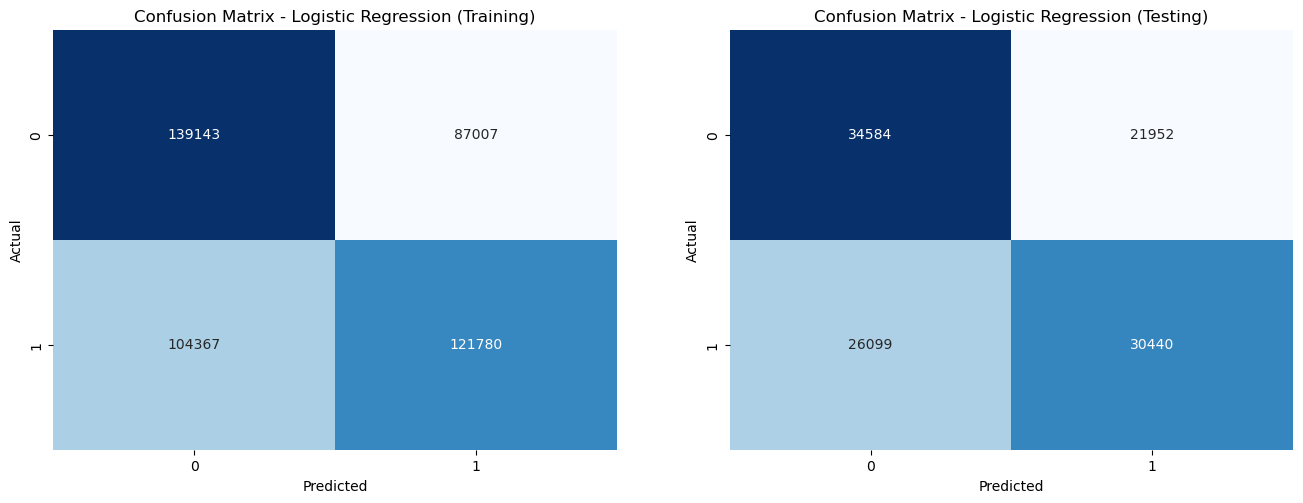

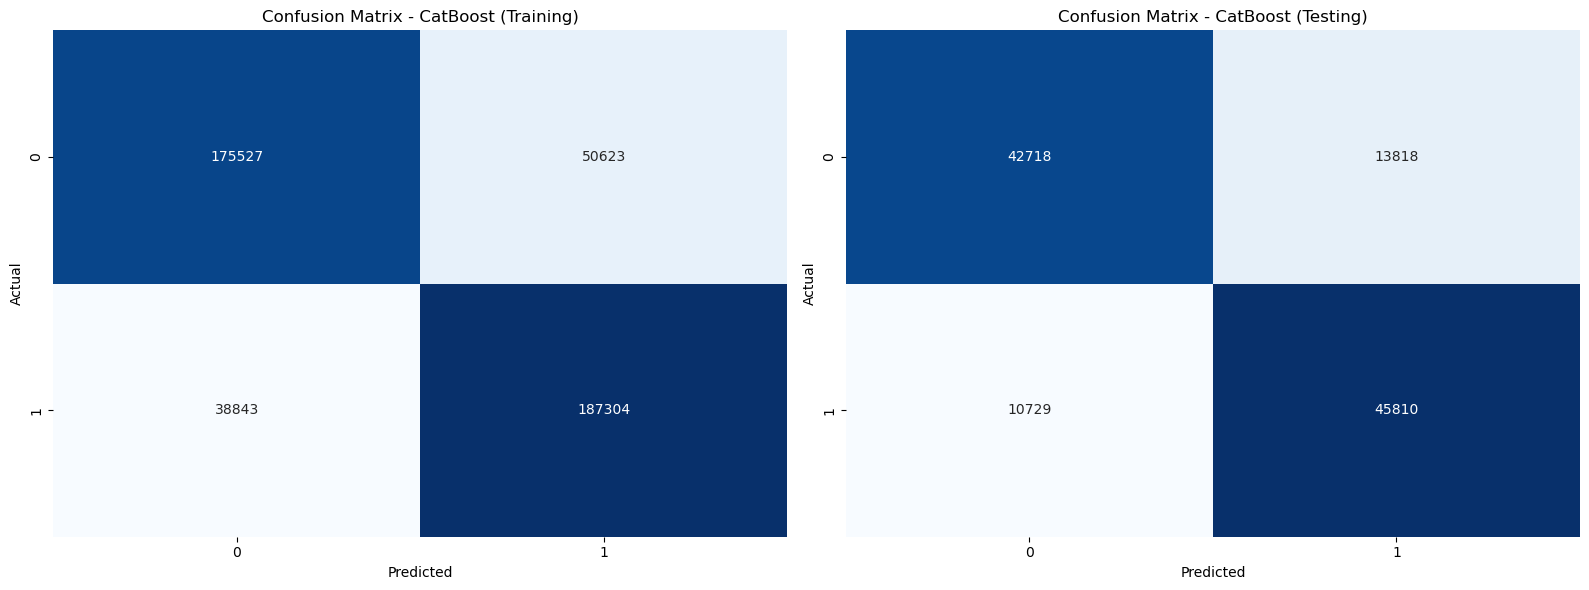


Classification Report - Logistic Regression (Training):
              precision    recall  f1-score   support

           0       0.57      0.62      0.59    226150
           1       0.58      0.54      0.56    226147

    accuracy                           0.58    452297
   macro avg       0.58      0.58      0.58    452297
weighted avg       0.58      0.58      0.58    452297


Classification Report - Logistic Regression (Testing):
              precision    recall  f1-score   support

           0       0.57      0.61      0.59     56536
           1       0.58      0.54      0.56     56539

    accuracy                           0.58    113075
   macro avg       0.58      0.58      0.57    113075
weighted avg       0.58      0.58      0.57    113075


Classification Report - CatBoost (Training):
              precision    recall  f1-score   support

           0       0.82      0.78      0.80    226150
           1       0.79      0.83      0.81    226147

    accuracy           

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Memisahkan fitur dan target
X = df.drop(columns=['TARGET','SK_ID_CURR'])
y = df['TARGET']

# Melakukan Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Membagi data yang telah di-resample menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Menginisialisasi model Logistic Regression, GBC, XGBoost, dan CatBoost
logistic_regression = LogisticRegression()
# gbc = GradientBoostingClassifier()
# xgb = XGBClassifier()
catboost = CatBoostClassifier()

# Melatih model Logistic Regression
logistic_regression.fit(X_train, y_train)

# # Melatih model GBC
# gbc.fit(X_train, y_train)

# # Melatih model XGBoost
# xgb.fit(X_train, y_train)

# Melatih model CatBoost
catboost.fit(X_train, y_train)

# Melakukan prediksi pada data latih dan data uji
y_pred_train_lr = logistic_regression.predict(X_train)
y_pred_test_lr = logistic_regression.predict(X_test)

# y_pred_train_gbc = gbc.predict(X_train)
# y_pred_test_gbc = gbc.predict(X_test)

# y_pred_train_xgb = xgb.predict(X_train)
# y_pred_test_xgb = xgb.predict(X_test)

y_pred_train_catboost = catboost.predict(X_train)
y_pred_test_catboost = catboost.predict(X_test)

# Menghitung akurasi masing-masing model untuk data latih dan data uji
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)

# accuracy_train_gbc = accuracy_score(y_train, y_pred_train_gbc)
# accuracy_test_gbc = accuracy_score(y_test, y_pred_test_gbc)

# accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
# accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

accuracy_train_catboost = accuracy_score(y_train, y_pred_train_catboost)
accuracy_test_catboost = accuracy_score(y_test, y_pred_test_catboost)

# Menampilkan akurasi
print("Accuracy of Logistic Regression (Training):", accuracy_train_lr)
print("Accuracy of Logistic Regression (Testing):", accuracy_test_lr)
# print("Accuracy of Gradient Boosting Classifier (Training):", accuracy_train_gbc)
# print("Accuracy of Gradient Boosting Classifier (Testing):", accuracy_test_gbc)
# print("Accuracy of XGBoost (Training):", accuracy_train_xgb)
# print("Accuracy of XGBoost (Testing):", accuracy_test_xgb)
print("Accuracy of CatBoost (Training):", accuracy_train_catboost)
print("Accuracy of CatBoost (Testing):", accuracy_test_catboost)

# Membuat confusion matrix untuk data latih dan data uji
cm_train_lr = confusion_matrix(y_train, y_pred_train_lr)
cm_test_lr = confusion_matrix(y_test, y_pred_test_lr)

# cm_train_gbc = confusion_matrix(y_train, y_pred_train_gbc)
# cm_test_gbc = confusion_matrix(y_test, y_pred_test_gbc)

# cm_train_xgb = confusion_matrix(y_train, y_pred_train_xgb)
# cm_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

cm_train_catboost = confusion_matrix(y_train, y_pred_train_catboost)
cm_test_catboost = confusion_matrix(y_test, y_pred_test_catboost)

# Visualisasi confusion matrix
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.heatmap(cm_train_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 2)
sns.heatmap(cm_test_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# plt.subplot(2, 2, 3)
# sns.heatmap(cm_train_gbc, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('Confusion Matrix - Gradient Boosting Classifier (Training)')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')

# plt.subplot(2, 2, 4)
# sns.heatmap(cm_test_gbc, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('Confusion Matrix - Gradient Boosting Classifier (Testing)')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')

# plt.tight_layout()
# plt.show()

# # Visualisasi confusion matrix untuk XGBoost
# plt.figure(figsize=(16, 6))

# plt.subplot(1, 2, 1)
# sns.heatmap(cm_train_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('Confusion Matrix - XGBoost (Training)')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')

# plt.subplot(1, 2, 2)
# sns.heatmap(cm_test_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('Confusion Matrix - XGBoost (Testing)')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')

# plt.tight_layout()
# plt.show()

# Visualisasi confusion matrix untuk CatBoost
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train_catboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - CatBoost (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test_catboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - CatBoost (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Menampilkan classification report
print("\nClassification Report - Logistic Regression (Training):")
print(classification_report(y_train, y_pred_train_lr))

print("\nClassification Report - Logistic Regression (Testing):")
print(classification_report(y_test, y_pred_test_lr))

# print("\nClassification Report - Gradient Boosting Classifier (Training):")
# print(classification_report(y_train, y_pred_train_gbc))

# print("\nClassification Report - Gradient Boosting Classifier (Testing):")
# print(classification_report(y_test, y_pred_test_gbc))

# print("\nClassification Report - XGBoost (Training):")
# print(classification_report(y_train, y_pred_train_xgb))

# print("\nClassification Report - XGBoost (Testing):")
# print(classification_report(y_test, y_pred_test_xgb))

print("\nClassification Report - CatBoost (Training):")
print(classification_report(y_train, y_pred_train_catboost))

print("\nClassification Report - CatBoost (Testing):")
print(classification_report(y_test, y_pred_test_catboost))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.140217
0:	learn: 0.6744900	total: 87.3ms	remaining: 1m 27s
1:	learn: 0.6602853	total: 265ms	remaining: 2m 12s
2:	learn: 0.6494201	total: 389ms	remaining: 2m 9s
3:	learn: 0.6407065	total: 496ms	remaining: 2m 3s
4:	learn: 0.6340910	total: 588ms	remaining: 1m 56s
5:	learn: 0.6285048	total: 683ms	remaining: 1m 53s
6:	learn: 0.6244053	total: 783ms	remaining: 1m 51s
7:	learn: 0.6208445	total: 881ms	remaining: 1m 49s
8:	learn: 0.6179367	total: 1.06s	remaining: 1m 56s
9:	learn: 0.6152696	total: 1.15s	remaining: 1m 53s
10:	learn: 0.6126254	total: 1.27s	remaining: 1m 54s
11:	learn: 0.6105853	total: 1.37s	remaining: 1m 52s
12:	learn: 0.6088948	total: 1.46s	remaining: 1m 50s
13:	learn: 0.6072001	total: 1.57s	remaining: 1m 50s
14:	learn: 0.6059328	total: 1.65s	remaining: 1m 48s
15:	learn: 0.6047036	total: 1.74s	remaining: 1m 47s
16:	learn: 0.6032699	total: 1.84s	remaining: 1m 46s
17:	learn: 0.6020847	total: 1.94s	remaining: 1m 46s
18:	learn: 0.6011402	total: 2.04s	remaining: 

158:	learn: 0.5635798	total: 15.4s	remaining: 1m 21s
159:	learn: 0.5633910	total: 15.5s	remaining: 1m 21s
160:	learn: 0.5631906	total: 15.6s	remaining: 1m 21s
161:	learn: 0.5630121	total: 15.7s	remaining: 1m 21s
162:	learn: 0.5628243	total: 15.8s	remaining: 1m 21s
163:	learn: 0.5626538	total: 15.9s	remaining: 1m 21s
164:	learn: 0.5624446	total: 16s	remaining: 1m 20s
165:	learn: 0.5622456	total: 16.1s	remaining: 1m 20s
166:	learn: 0.5620427	total: 16.2s	remaining: 1m 20s
167:	learn: 0.5618017	total: 16.3s	remaining: 1m 20s
168:	learn: 0.5616216	total: 16.4s	remaining: 1m 20s
169:	learn: 0.5613758	total: 16.5s	remaining: 1m 20s
170:	learn: 0.5612338	total: 16.6s	remaining: 1m 20s
171:	learn: 0.5611073	total: 16.6s	remaining: 1m 20s
172:	learn: 0.5609119	total: 16.7s	remaining: 1m 19s
173:	learn: 0.5607295	total: 16.8s	remaining: 1m 19s
174:	learn: 0.5605202	total: 16.9s	remaining: 1m 19s
175:	learn: 0.5603613	total: 17s	remaining: 1m 19s
176:	learn: 0.5602316	total: 17.1s	remaining: 1m 1

316:	learn: 0.5366093	total: 30.9s	remaining: 1m 6s
317:	learn: 0.5364821	total: 31s	remaining: 1m 6s
318:	learn: 0.5363436	total: 31.1s	remaining: 1m 6s
319:	learn: 0.5362019	total: 31.2s	remaining: 1m 6s
320:	learn: 0.5360155	total: 31.3s	remaining: 1m 6s
321:	learn: 0.5358328	total: 31.4s	remaining: 1m 6s
322:	learn: 0.5356642	total: 31.5s	remaining: 1m 6s
323:	learn: 0.5355012	total: 31.6s	remaining: 1m 5s
324:	learn: 0.5353512	total: 31.7s	remaining: 1m 5s
325:	learn: 0.5351843	total: 31.8s	remaining: 1m 5s
326:	learn: 0.5350553	total: 31.9s	remaining: 1m 5s
327:	learn: 0.5348696	total: 32s	remaining: 1m 5s
328:	learn: 0.5347118	total: 32.1s	remaining: 1m 5s
329:	learn: 0.5346057	total: 32.2s	remaining: 1m 5s
330:	learn: 0.5344753	total: 32.3s	remaining: 1m 5s
331:	learn: 0.5342605	total: 32.4s	remaining: 1m 5s
332:	learn: 0.5341020	total: 32.5s	remaining: 1m 5s
333:	learn: 0.5339810	total: 32.6s	remaining: 1m 4s
334:	learn: 0.5338098	total: 32.7s	remaining: 1m 4s
335:	learn: 0.53

476:	learn: 0.5135362	total: 47s	remaining: 51.5s
477:	learn: 0.5133855	total: 47.1s	remaining: 51.5s
478:	learn: 0.5132743	total: 47.2s	remaining: 51.4s
479:	learn: 0.5131444	total: 47.3s	remaining: 51.3s
480:	learn: 0.5129931	total: 47.4s	remaining: 51.2s
481:	learn: 0.5128599	total: 47.5s	remaining: 51.1s
482:	learn: 0.5127399	total: 47.6s	remaining: 51s
483:	learn: 0.5126205	total: 47.7s	remaining: 50.9s
484:	learn: 0.5124926	total: 47.8s	remaining: 50.8s
485:	learn: 0.5123595	total: 47.9s	remaining: 50.7s
486:	learn: 0.5122236	total: 48s	remaining: 50.5s
487:	learn: 0.5120689	total: 48.1s	remaining: 50.5s
488:	learn: 0.5119778	total: 48.2s	remaining: 50.4s
489:	learn: 0.5118749	total: 48.3s	remaining: 50.3s
490:	learn: 0.5117437	total: 48.4s	remaining: 50.2s
491:	learn: 0.5116377	total: 48.5s	remaining: 50.1s
492:	learn: 0.5115226	total: 48.6s	remaining: 49.9s
493:	learn: 0.5113754	total: 48.7s	remaining: 49.8s
494:	learn: 0.5112197	total: 48.8s	remaining: 49.8s
495:	learn: 0.5110

636:	learn: 0.4932949	total: 1m 3s	remaining: 36s
637:	learn: 0.4931994	total: 1m 3s	remaining: 35.9s
638:	learn: 0.4930768	total: 1m 3s	remaining: 35.8s
639:	learn: 0.4929506	total: 1m 3s	remaining: 35.7s
640:	learn: 0.4928386	total: 1m 3s	remaining: 35.6s
641:	learn: 0.4927488	total: 1m 3s	remaining: 35.5s
642:	learn: 0.4926256	total: 1m 3s	remaining: 35.4s
643:	learn: 0.4925528	total: 1m 3s	remaining: 35.3s
644:	learn: 0.4924201	total: 1m 3s	remaining: 35.2s
645:	learn: 0.4923030	total: 1m 4s	remaining: 35.1s
646:	learn: 0.4921718	total: 1m 4s	remaining: 35s
647:	learn: 0.4920577	total: 1m 4s	remaining: 34.9s
648:	learn: 0.4919290	total: 1m 4s	remaining: 34.8s
649:	learn: 0.4917649	total: 1m 4s	remaining: 34.7s
650:	learn: 0.4916472	total: 1m 4s	remaining: 34.6s
651:	learn: 0.4915167	total: 1m 4s	remaining: 34.5s
652:	learn: 0.4914089	total: 1m 4s	remaining: 34.4s
653:	learn: 0.4912884	total: 1m 4s	remaining: 34.3s
654:	learn: 0.4911789	total: 1m 5s	remaining: 34.3s
655:	learn: 0.49

793:	learn: 0.4763085	total: 1m 19s	remaining: 20.5s
794:	learn: 0.4761908	total: 1m 19s	remaining: 20.4s
795:	learn: 0.4760821	total: 1m 19s	remaining: 20.3s
796:	learn: 0.4759981	total: 1m 19s	remaining: 20.2s
797:	learn: 0.4759070	total: 1m 19s	remaining: 20.1s
798:	learn: 0.4758064	total: 1m 19s	remaining: 20s
799:	learn: 0.4756980	total: 1m 19s	remaining: 19.9s
800:	learn: 0.4755466	total: 1m 19s	remaining: 19.8s
801:	learn: 0.4754373	total: 1m 19s	remaining: 19.7s
802:	learn: 0.4753276	total: 1m 20s	remaining: 19.6s
803:	learn: 0.4751999	total: 1m 20s	remaining: 19.5s
804:	learn: 0.4751080	total: 1m 20s	remaining: 19.4s
805:	learn: 0.4750144	total: 1m 20s	remaining: 19.3s
806:	learn: 0.4749181	total: 1m 20s	remaining: 19.2s
807:	learn: 0.4748299	total: 1m 20s	remaining: 19.1s
808:	learn: 0.4747265	total: 1m 20s	remaining: 19.1s
809:	learn: 0.4745822	total: 1m 20s	remaining: 19s
810:	learn: 0.4744845	total: 1m 20s	remaining: 18.9s
811:	learn: 0.4743961	total: 1m 21s	remaining: 18.

949:	learn: 0.4605885	total: 1m 34s	remaining: 4.99s
950:	learn: 0.4604529	total: 1m 34s	remaining: 4.89s
951:	learn: 0.4603183	total: 1m 35s	remaining: 4.79s
952:	learn: 0.4601826	total: 1m 35s	remaining: 4.69s
953:	learn: 0.4600633	total: 1m 35s	remaining: 4.59s
954:	learn: 0.4599989	total: 1m 35s	remaining: 4.49s
955:	learn: 0.4599121	total: 1m 35s	remaining: 4.39s
956:	learn: 0.4597816	total: 1m 35s	remaining: 4.29s
957:	learn: 0.4597340	total: 1m 35s	remaining: 4.19s
958:	learn: 0.4596179	total: 1m 35s	remaining: 4.09s
959:	learn: 0.4595043	total: 1m 35s	remaining: 3.99s
960:	learn: 0.4594258	total: 1m 35s	remaining: 3.89s
961:	learn: 0.4593477	total: 1m 36s	remaining: 3.79s
962:	learn: 0.4592823	total: 1m 36s	remaining: 3.69s
963:	learn: 0.4592007	total: 1m 36s	remaining: 3.59s
964:	learn: 0.4591063	total: 1m 36s	remaining: 3.49s
965:	learn: 0.4589997	total: 1m 36s	remaining: 3.4s
966:	learn: 0.4588906	total: 1m 36s	remaining: 3.3s
967:	learn: 0.4587884	total: 1m 36s	remaining: 3

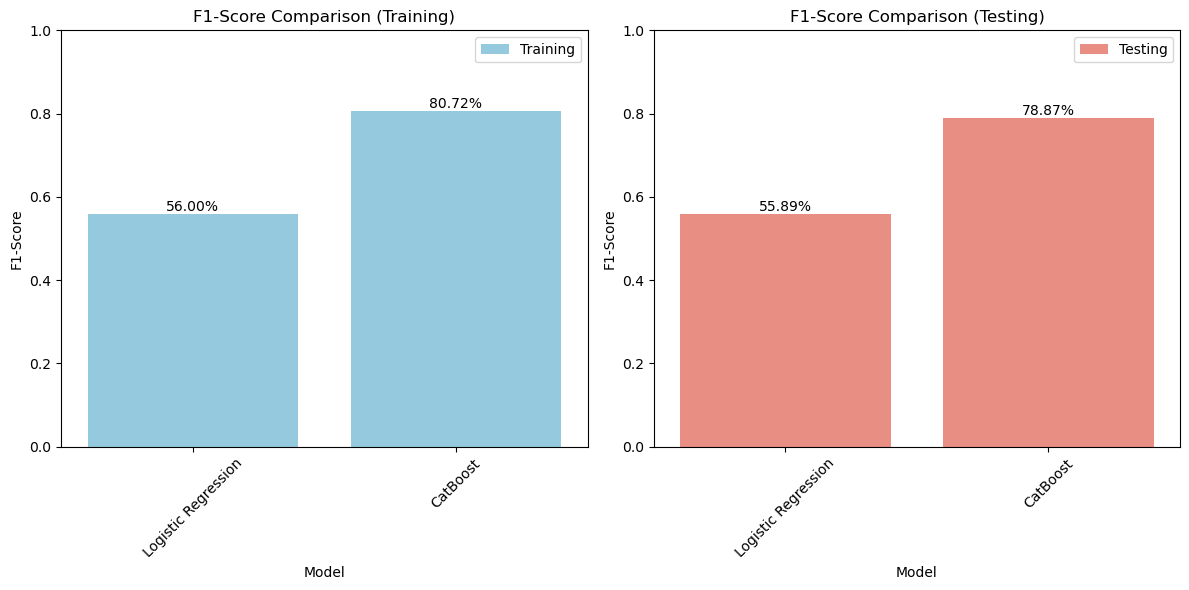

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Memisahkan fitur dan target
X = df.drop(columns=['TARGET','SK_ID_CURR'])
y = df['TARGET']

# Melakukan Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Membagi data yang telah di-resample menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Menginisialisasi model Logistic Regression, GBC, XGBoost, dan CatBoost
logistic_regression = LogisticRegression()
# gbc = GradientBoostingClassifier()
# xgb = XGBClassifier()
catboost = CatBoostClassifier()

# Melatih model Logistic Regression
logistic_regression.fit(X_train, y_train)

# # Melatih model GBC
# gbc.fit(X_train, y_train)

# # Melatih model XGBoost
# xgb.fit(X_train, y_train)

# Melatih model CatBoost
catboost.fit(X_train, y_train)

# Melakukan prediksi pada data latih dan data uji
y_pred_train_lr = logistic_regression.predict(X_train)
y_pred_test_lr = logistic_regression.predict(X_test)

# y_pred_train_gbc = gbc.predict(X_train)
# y_pred_test_gbc = gbc.predict(X_test)

# y_pred_train_xgb = xgb.predict(X_train)
# y_pred_test_xgb = xgb.predict(X_test)

y_pred_train_catboost = catboost.predict(X_train)
y_pred_test_catboost = catboost.predict(X_test)

# Menghitung f1-score masing-masing model untuk data latih dan data uji
f1_train_lr = f1_score(y_train, y_pred_train_lr)
f1_test_lr = f1_score(y_test, y_pred_test_lr)

# f1_train_gbc = f1_score(y_train, y_pred_train_gbc)
# f1_test_gbc = f1_score(y_test, y_pred_test_gbc)

# f1_train_xgb = f1_score(y_train, y_pred_train_xgb)
# f1_test_xgb = f1_score(y_test, y_pred_test_xgb)

f1_train_catboost = f1_score(y_train, y_pred_train_catboost)
f1_test_catboost = f1_score(y_test, y_pred_test_catboost)

# Menampilkan f1-score
print("F1-Score of Logistic Regression (Training):", f1_train_lr)
print("F1-Score of Logistic Regression (Testing):", f1_test_lr)
# print("F1-Score of Gradient Boosting Classifier (Training):", f1_train_gbc)
# print("F1-Score of Gradient Boosting Classifier (Testing):", f1_test_gbc)
# print("F1-Score of XGBoost (Training):", f1_train_xgb)
# print("F1-Score of XGBoost (Testing):", f1_test_xgb)
print("F1-Score of CatBoost (Training):", f1_train_catboost)
print("F1-Score of CatBoost (Testing):", f1_test_catboost)

# Membuat dataframe untuk menyimpan hasil f1-score
f1_scores = pd.DataFrame({
    'Model': ['Logistic Regression', 'CatBoost'],
    'F1-Score (Training)': [f1_train_lr, f1_train_catboost],
    'F1-Score (Testing)': [f1_test_lr, f1_test_catboost]
})

# Visualisasi f1-score menggunakan bar plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=f1_scores, x='Model', y='F1-Score (Training)', color='skyblue', label='Training')
for index, value in enumerate(f1_scores['F1-Score (Training)']):
    plt.text(index, value, '{:.2f}%'.format(value * 100), ha='center', va='bottom')
plt.title('F1-Score Comparison (Training)')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
sns.barplot(data=f1_scores, x='Model', y='F1-Score (Testing)', color='salmon', label='Testing')
for index, value in enumerate(f1_scores['F1-Score (Testing)']):
    plt.text(index, value, '{:.2f}%'.format(value * 100), ha='center', va='bottom')
plt.title('F1-Score Comparison (Testing)')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

Best Parameters: {'C': 0.01, 'penalty': 'l2'}


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-Score of Best Logistic Regression (Training): 0.5594163973547155
F1-Score of Best Logistic Regression (Testing): 0.5587978333042111


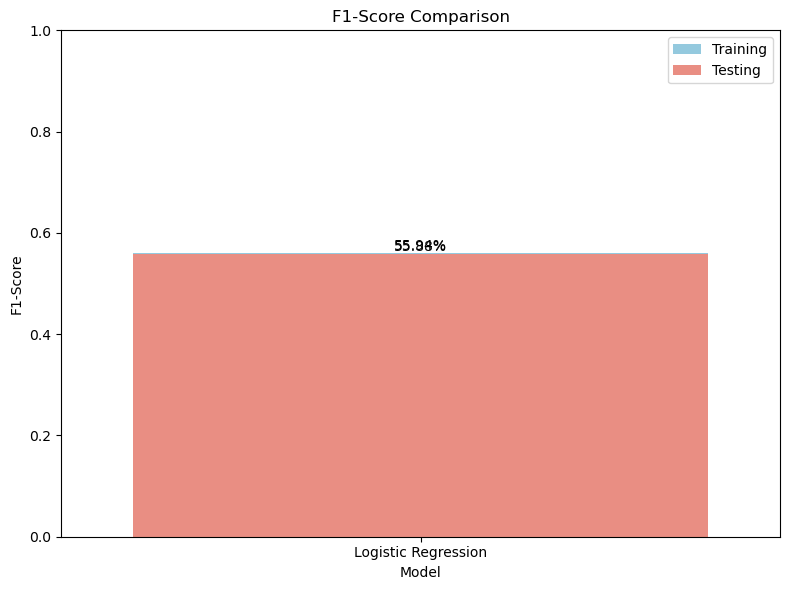

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Memisahkan fitur dan target
X = df.drop(columns=['TARGET','SK_ID_CURR'])
y = df['TARGET']

# Melakukan Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Membagi data yang telah di-resample menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Inisialisasi model Regresi Logistik
logistic_regression = LogisticRegression()

# Parameter grid untuk pencarian grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Inisialisasi grid search dengan model Regresi Logistik dan parameter grid
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Lakukan grid search pada data latih
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik yang ditemukan
print("Best Parameters:", grid_search.best_params_)

# Membuat model Regresi Logistik dengan parameter terbaik
best_logistic_regression = grid_search.best_estimator_

# Melatih model Regresi Logistik dengan parameter terbaik
best_logistic_regression.fit(X_train, y_train)

# Prediksi menggunakan model Regresi Logistik terbaik
y_pred_train_lr = best_logistic_regression.predict(X_train)
y_pred_test_lr = best_logistic_regression.predict(X_test)

# Menghitung f1-score untuk model Regresi Logistik terbaik
f1_train_lr = f1_score(y_train, y_pred_train_lr)
f1_test_lr = f1_score(y_test, y_pred_test_lr)

# Menampilkan f1-score untuk model Regresi Logistik terbaik
print("F1-Score of Best Logistic Regression (Training):", f1_train_lr)
print("F1-Score of Best Logistic Regression (Testing):", f1_test_lr)

# Membuat dataframe untuk menyimpan hasil f1-score
f1_scores = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'F1-Score (Training)': [f1_train_lr],
    'F1-Score (Testing)': [f1_test_lr]
})

# Visualisasi f1-score menggunakan bar plot
plt.figure(figsize=(8, 6))

sns.barplot(data=f1_scores, x='Model', y='F1-Score (Training)', color='skyblue', label='Training')
plt.text(0, f1_train_lr, '{:.2f}%'.format(f1_train_lr * 100), ha='center', va='bottom')
sns.barplot(data=f1_scores, x='Model', y='F1-Score (Testing)', color='salmon', label='Testing')
plt.text(0, f1_test_lr, '{:.2f}%'.format(f1_test_lr * 100), ha='center', va='bottom')

plt.title('F1-Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.ylim(0, 1)

plt.legend()
plt.tight_layout()
plt.show()


In [18]:
df.shape

(307511, 73)

In [22]:
new_df = pd.read_csv('data_test_clean.csv')

In [23]:
from sklearn.preprocessing import LabelEncoder

# Memilih kolom dengan tipe data objek
obj_cols = new_df.select_dtypes(include=['object']).columns

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan transformasi label encoder untuk setiap kolom objek
for col in obj_cols:
    new_df[col] = label_encoder.fit_transform(new_df[col])

# Menampilkan hasil transformasi
print(new_df[obj_cols].head())

   NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                   0            0             0                1   
1                   0            1             0                1   
2                   0            1             1                1   
3                   0            0             0                1   
4                   0            1             1                0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 6                    1                   1   
1                6                 6                    4                   1   
2                6                 6                    1                   1   
3                6                 6                    4                   1   
4                6                 6                    4                   1   

   NAME_HOUSING_TYPE  OCCUPATION_TYPE  WEEKDAY_APPR_PROCESS_START  \
0                  1         

In [25]:
import pandas as pd
from catboost import CatBoostClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Memisahkan fitur dan target
X = df.drop(columns=['TARGET','SK_ID_CURR'])
y = df['TARGET']

# Melakukan Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Membagi data yang telah di-resample menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

catboost = CatBoostClassifier()

# Melatih model CatBoost
catboost.fit(X_train, y_train)

y_pred_train_catboost = catboost.predict(X_train)
y_pred_test_catboost = catboost.predict(X_test)

f1_train_catboost = f1_score(y_train, y_pred_train_catboost)
f1_test_catboost = f1_score(y_test, y_pred_test_catboost)

print("F1-Score of CatBoost (Training):", f1_train_catboost)
print("F1-Score of CatBoost (Testing):", f1_test_catboost)

# Persiapkan data baru untuk diprediksi
X_new = new_df.drop(columns=['SK_ID_CURR'])  # Drop kolom ID jika ada

# Gunakan model CatBoost yang telah dilatih sebelumnya untuk melakukan prediksi
y_pred_new = catboost.predict(X_new)

# Tambahkan hasil prediksi sebagai kolom baru ke dalam dataset baru
new_df['PREDICTED_TARGET'] = y_pred_new

# Simpan dataset baru yang telah diprediksi
new_df.to_csv("predicted_new_data.csv", index=False)  # Gantilah "predicted_new_data.csv" dengan nama file yang Anda inginkan


Learning rate set to 0.140217
0:	learn: 0.6744900	total: 147ms	remaining: 2m 26s
1:	learn: 0.6602853	total: 270ms	remaining: 2m 14s
2:	learn: 0.6494201	total: 400ms	remaining: 2m 12s
3:	learn: 0.6407065	total: 529ms	remaining: 2m 11s
4:	learn: 0.6340910	total: 663ms	remaining: 2m 11s
5:	learn: 0.6285048	total: 779ms	remaining: 2m 8s
6:	learn: 0.6244053	total: 912ms	remaining: 2m 9s
7:	learn: 0.6208445	total: 1.06s	remaining: 2m 12s
8:	learn: 0.6179367	total: 1.21s	remaining: 2m 12s
9:	learn: 0.6152696	total: 1.33s	remaining: 2m 11s
10:	learn: 0.6126254	total: 1.46s	remaining: 2m 11s
11:	learn: 0.6105853	total: 1.59s	remaining: 2m 11s
12:	learn: 0.6088948	total: 1.72s	remaining: 2m 10s
13:	learn: 0.6072001	total: 1.84s	remaining: 2m 9s
14:	learn: 0.6059328	total: 1.96s	remaining: 2m 8s
15:	learn: 0.6047036	total: 2.1s	remaining: 2m 8s
16:	learn: 0.6032699	total: 2.23s	remaining: 2m 9s
17:	learn: 0.6020847	total: 2.37s	remaining: 2m 9s
18:	learn: 0.6011402	total: 2.5s	remaining: 2m 9s
19

159:	learn: 0.5633910	total: 21s	remaining: 1m 50s
160:	learn: 0.5631906	total: 21.1s	remaining: 1m 50s
161:	learn: 0.5630121	total: 21.3s	remaining: 1m 49s
162:	learn: 0.5628243	total: 21.4s	remaining: 1m 49s
163:	learn: 0.5626538	total: 21.5s	remaining: 1m 49s
164:	learn: 0.5624446	total: 21.6s	remaining: 1m 49s
165:	learn: 0.5622456	total: 21.7s	remaining: 1m 49s
166:	learn: 0.5620427	total: 21.9s	remaining: 1m 49s
167:	learn: 0.5618017	total: 22.1s	remaining: 1m 49s
168:	learn: 0.5616216	total: 22.2s	remaining: 1m 49s
169:	learn: 0.5613758	total: 22.3s	remaining: 1m 48s
170:	learn: 0.5612338	total: 22.5s	remaining: 1m 49s
171:	learn: 0.5611073	total: 22.7s	remaining: 1m 49s
172:	learn: 0.5609119	total: 22.8s	remaining: 1m 49s
173:	learn: 0.5607295	total: 23s	remaining: 1m 49s
174:	learn: 0.5605202	total: 23.2s	remaining: 1m 49s
175:	learn: 0.5603613	total: 23.3s	remaining: 1m 49s
176:	learn: 0.5602316	total: 23.5s	remaining: 1m 49s
177:	learn: 0.5600657	total: 23.7s	remaining: 1m 4

316:	learn: 0.5366093	total: 42.6s	remaining: 1m 31s
317:	learn: 0.5364821	total: 42.7s	remaining: 1m 31s
318:	learn: 0.5363436	total: 42.8s	remaining: 1m 31s
319:	learn: 0.5362019	total: 43s	remaining: 1m 31s
320:	learn: 0.5360155	total: 43.1s	remaining: 1m 31s
321:	learn: 0.5358328	total: 43.2s	remaining: 1m 31s
322:	learn: 0.5356642	total: 43.4s	remaining: 1m 30s
323:	learn: 0.5355012	total: 43.5s	remaining: 1m 30s
324:	learn: 0.5353512	total: 43.6s	remaining: 1m 30s
325:	learn: 0.5351843	total: 43.7s	remaining: 1m 30s
326:	learn: 0.5350553	total: 43.9s	remaining: 1m 30s
327:	learn: 0.5348696	total: 44s	remaining: 1m 30s
328:	learn: 0.5347118	total: 44.1s	remaining: 1m 30s
329:	learn: 0.5346057	total: 44.3s	remaining: 1m 29s
330:	learn: 0.5344753	total: 44.4s	remaining: 1m 29s
331:	learn: 0.5342605	total: 44.5s	remaining: 1m 29s
332:	learn: 0.5341020	total: 44.7s	remaining: 1m 29s
333:	learn: 0.5339810	total: 44.8s	remaining: 1m 29s
334:	learn: 0.5338098	total: 44.9s	remaining: 1m 2

472:	learn: 0.5140832	total: 1m 2s	remaining: 1m 9s
473:	learn: 0.5139519	total: 1m 2s	remaining: 1m 9s
474:	learn: 0.5137924	total: 1m 2s	remaining: 1m 9s
475:	learn: 0.5137081	total: 1m 3s	remaining: 1m 9s
476:	learn: 0.5135362	total: 1m 3s	remaining: 1m 9s
477:	learn: 0.5133855	total: 1m 3s	remaining: 1m 9s
478:	learn: 0.5132743	total: 1m 3s	remaining: 1m 8s
479:	learn: 0.5131444	total: 1m 3s	remaining: 1m 8s
480:	learn: 0.5129931	total: 1m 3s	remaining: 1m 8s
481:	learn: 0.5128599	total: 1m 3s	remaining: 1m 8s
482:	learn: 0.5127399	total: 1m 3s	remaining: 1m 8s
483:	learn: 0.5126205	total: 1m 4s	remaining: 1m 8s
484:	learn: 0.5124926	total: 1m 4s	remaining: 1m 8s
485:	learn: 0.5123595	total: 1m 4s	remaining: 1m 7s
486:	learn: 0.5122236	total: 1m 4s	remaining: 1m 7s
487:	learn: 0.5120689	total: 1m 4s	remaining: 1m 7s
488:	learn: 0.5119778	total: 1m 4s	remaining: 1m 7s
489:	learn: 0.5118749	total: 1m 4s	remaining: 1m 7s
490:	learn: 0.5117437	total: 1m 4s	remaining: 1m 7s
491:	learn: 

630:	learn: 0.4940004	total: 1m 23s	remaining: 48.8s
631:	learn: 0.4938590	total: 1m 23s	remaining: 48.7s
632:	learn: 0.4937511	total: 1m 23s	remaining: 48.5s
633:	learn: 0.4936248	total: 1m 23s	remaining: 48.4s
634:	learn: 0.4935303	total: 1m 23s	remaining: 48.2s
635:	learn: 0.4934182	total: 1m 24s	remaining: 48.1s
636:	learn: 0.4932949	total: 1m 24s	remaining: 48s
637:	learn: 0.4931994	total: 1m 24s	remaining: 47.8s
638:	learn: 0.4930768	total: 1m 24s	remaining: 47.7s
639:	learn: 0.4929506	total: 1m 24s	remaining: 47.5s
640:	learn: 0.4928386	total: 1m 24s	remaining: 47.4s
641:	learn: 0.4927488	total: 1m 24s	remaining: 47.3s
642:	learn: 0.4926256	total: 1m 24s	remaining: 47.1s
643:	learn: 0.4925528	total: 1m 24s	remaining: 47s
644:	learn: 0.4924201	total: 1m 25s	remaining: 46.9s
645:	learn: 0.4923030	total: 1m 25s	remaining: 46.7s
646:	learn: 0.4921718	total: 1m 25s	remaining: 46.6s
647:	learn: 0.4920577	total: 1m 25s	remaining: 46.4s
648:	learn: 0.4919290	total: 1m 25s	remaining: 46.

786:	learn: 0.4770293	total: 1m 43s	remaining: 28.1s
787:	learn: 0.4769461	total: 1m 43s	remaining: 28s
788:	learn: 0.4768133	total: 1m 44s	remaining: 27.8s
789:	learn: 0.4767333	total: 1m 44s	remaining: 27.7s
790:	learn: 0.4766419	total: 1m 44s	remaining: 27.6s
791:	learn: 0.4765445	total: 1m 44s	remaining: 27.4s
792:	learn: 0.4764121	total: 1m 44s	remaining: 27.3s
793:	learn: 0.4763085	total: 1m 44s	remaining: 27.2s
794:	learn: 0.4761908	total: 1m 44s	remaining: 27s
795:	learn: 0.4760821	total: 1m 44s	remaining: 26.9s
796:	learn: 0.4759981	total: 1m 45s	remaining: 26.8s
797:	learn: 0.4759070	total: 1m 45s	remaining: 26.6s
798:	learn: 0.4758064	total: 1m 45s	remaining: 26.5s
799:	learn: 0.4756980	total: 1m 45s	remaining: 26.4s
800:	learn: 0.4755466	total: 1m 45s	remaining: 26.2s
801:	learn: 0.4754373	total: 1m 45s	remaining: 26.1s
802:	learn: 0.4753276	total: 1m 45s	remaining: 26s
803:	learn: 0.4751999	total: 1m 45s	remaining: 25.8s
804:	learn: 0.4751080	total: 1m 46s	remaining: 25.7s

944:	learn: 0.4610601	total: 2m 5s	remaining: 7.3s
945:	learn: 0.4609542	total: 2m 5s	remaining: 7.17s
946:	learn: 0.4608423	total: 2m 5s	remaining: 7.04s
947:	learn: 0.4607670	total: 2m 5s	remaining: 6.9s
948:	learn: 0.4606929	total: 2m 5s	remaining: 6.77s
949:	learn: 0.4605885	total: 2m 6s	remaining: 6.63s
950:	learn: 0.4604529	total: 2m 6s	remaining: 6.5s
951:	learn: 0.4603183	total: 2m 6s	remaining: 6.37s
952:	learn: 0.4601826	total: 2m 6s	remaining: 6.24s
953:	learn: 0.4600633	total: 2m 6s	remaining: 6.11s
954:	learn: 0.4599989	total: 2m 6s	remaining: 5.97s
955:	learn: 0.4599121	total: 2m 6s	remaining: 5.84s
956:	learn: 0.4597816	total: 2m 6s	remaining: 5.71s
957:	learn: 0.4597340	total: 2m 7s	remaining: 5.57s
958:	learn: 0.4596179	total: 2m 7s	remaining: 5.44s
959:	learn: 0.4595043	total: 2m 7s	remaining: 5.3s
960:	learn: 0.4594258	total: 2m 7s	remaining: 5.17s
961:	learn: 0.4593477	total: 2m 7s	remaining: 5.04s
962:	learn: 0.4592823	total: 2m 7s	remaining: 4.91s
963:	learn: 0.45

In [26]:
df_count_new_predt = pd.read_csv('predicted_new_data.csv')
df_count_new_predt["PREDICTED_TARGET"].value_counts()

0    35901
1    12843
Name: PREDICTED_TARGET, dtype: int64

In [27]:
import pandas as pd

# Membaca file CSV dengan hasil prediksi
df_count_new_predt = pd.read_csv('predicted_new_data.csv')

# Menghitung jumlah nilai dalam kolom "PREDICTED_TARGET" dalam persentase
percentage_counts = df_count_new_predt["PREDICTED_TARGET"].value_counts(normalize=True) * 100

# Menampilkan hasil perhitungan dalam persentase
print("Persentase Hasil Prediksi:")
print(percentage_counts)


Persentase Hasil Prediksi:
0    73.652142
1    26.347858
Name: PREDICTED_TARGET, dtype: float64
